# CONVOLUTION

Enter the input signal x[n] using Dirac impulses (e.g., delta[n-3] + 2*delta[n+2] - delta[n]):


x[n]:  delta[n]


Enter the impulse response h[n] using Dirac impulses (e.g., delta[n] - delta[n-1]):


h[n]:  2*delta[n-2]


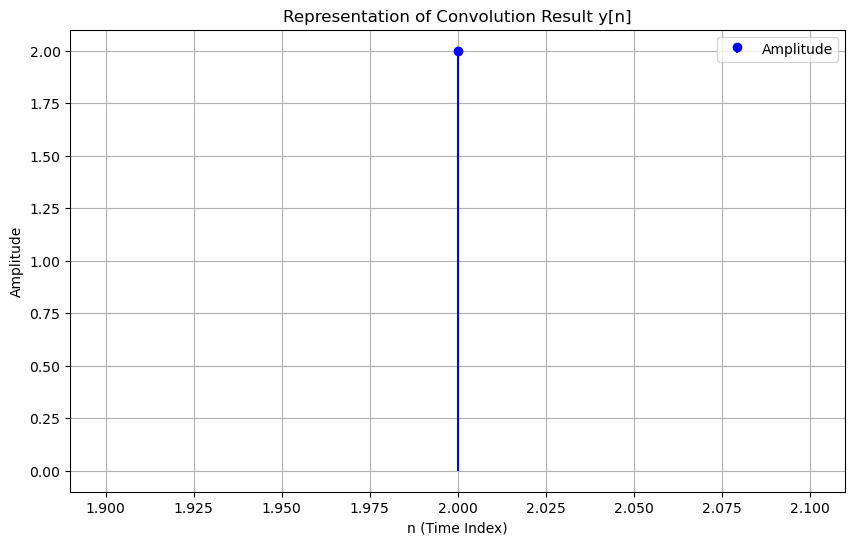

y[n] (Result of x[n] * h[n]): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Delta positions in y[n]: [2]


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import re

# Define the delta function
def delta(n):
    """
    Returns a discrete delta function at n=0.
    """
    return np.where(n == 0, 1, 0)

# Define the unit step function
def unit_step(n, shift):
    """
    Creates a unit step function shifted by `shift`.
    """
    return np.where(n >= -shift, 1, 0)

# Function to parse user input for delta impulses and step functions
def parse_delta_input(user_input, n_range):
    signal = np.zeros(len(n_range))
    
    # Match delta functions and step functions
    delta_matches = re.findall(r'([+-]?\d*)\*?delta\[n([+-]\d+)?\]', user_input)
    step_matches = re.findall(r'u\[n([+-]\d+)?\]', user_input)
    
    for amp, shift in delta_matches:
        # Parse amplitude and shift
        amplitude = 1 if amp in ["", "+"] else -1 if amp == "-" else int(amp)
        shift_value = int(shift) if shift else 0
        index = np.where(n_range == -shift_value)[0]
        
        if len(index) > 0:  # Ensure shift is within range
            signal[index] = amplitude

    for match in step_matches:
        shift_value = int(match) if match else 0
        signal += unit_step(n_range, shift_value)
    
    return signal

# Function to find positions of delta impulses
def find_delta_positions(signal, n_range):
    """Returns indices where the signal has non-zero values (impulse positions)."""
    return n_range[np.where(signal != 0)]

# Range of time indices
n = np.arange(-10, 11)

# User input for x[n] and h[n]
print("Enter the input signal x[n] using Dirac impulses (e.g., delta[n-3] + 2*delta[n+2] - delta[n]):")
x_input = input("x[n]: ")
print("Enter the impulse response h[n] using Dirac impulses (e.g., delta[n] - delta[n-1]):")
h_input = input("h[n]: ")

# Parse user inputs to generate signals
x = parse_delta_input(x_input, n)
h = parse_delta_input(h_input, n)

# Perform convolution
y = np.convolve(x, h, mode='full')
n_y = np.arange(2 * n[0], 2 * n[-1] + 1)  # Time indices for y

# Find positions and amplitudes of impulses in y[n]
delta_positions = find_delta_positions(y, n_y)
amplitudes = y[np.where(y != 0)]

# Check if delta positions and amplitudes are non-empty before plotting
if delta_positions.size > 0 and amplitudes.size > 0:
    # Plot the convolution result
    plt.figure(figsize=(10, 6))
    plt.stem(delta_positions, amplitudes, basefmt=" ", linefmt='b-', markerfmt='bo', label='Amplitude')
    plt.title("Representation of Convolution Result y[n]")
    plt.xlabel("n (Time Index)")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.legend()
    plt.show()

# Output results
print("y[n] (Result of x[n] * h[n]):", y)
print("Delta positions in y[n]:", delta_positions)



# FOURRIER
frequencies with 0 hz. write with cosine but f=0
frequencies with 1 amp. write the coeff

=== Resolution of Bilateral and Unilateral Spectra ===


Enter the full expression of x(t) (e.g., x(t) = 2*cos(2*pi*2000*t)) :  1*cos(2*pi*0*t)+3*cos(2*pi*1000*t)+2*cos(2*pi*2000*t)+1*cos(2*pi*3000*t)


Extracted Amplitudes and Frequencies: [(1.0, 0), (3.0, 1000), (2.0, 2000), (1.0, 3000)]


Enter the sampling frequency (in Hz):  8000
Enter the frequency limit for display (in Hz):  20000


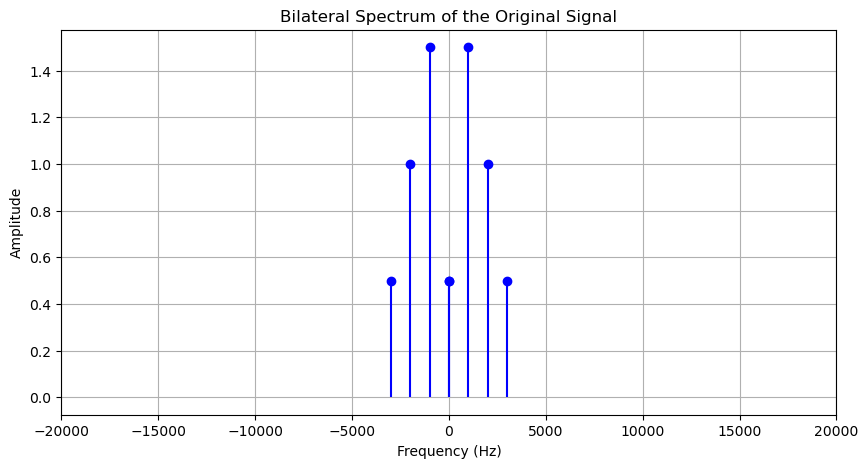

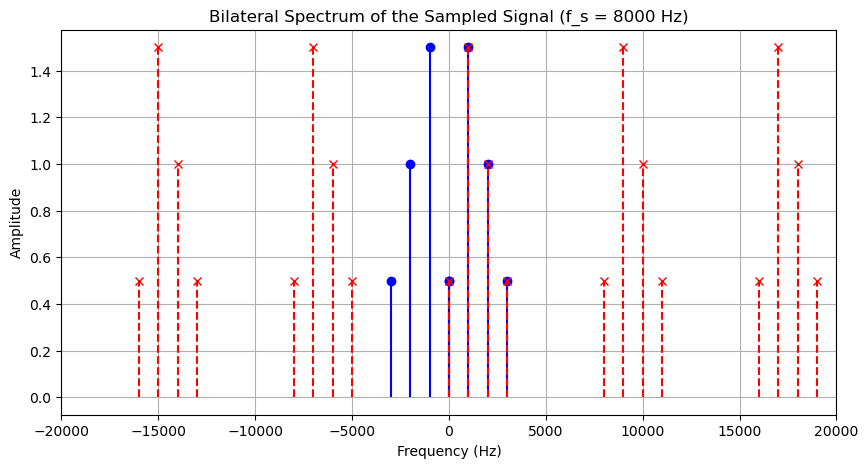

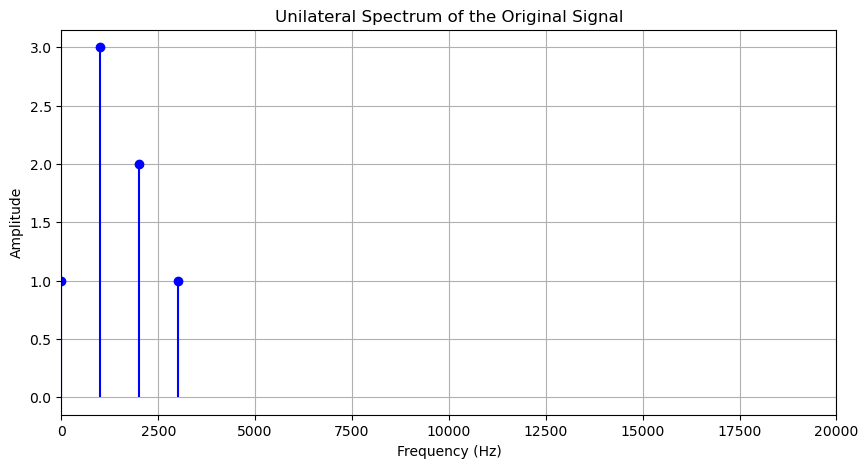

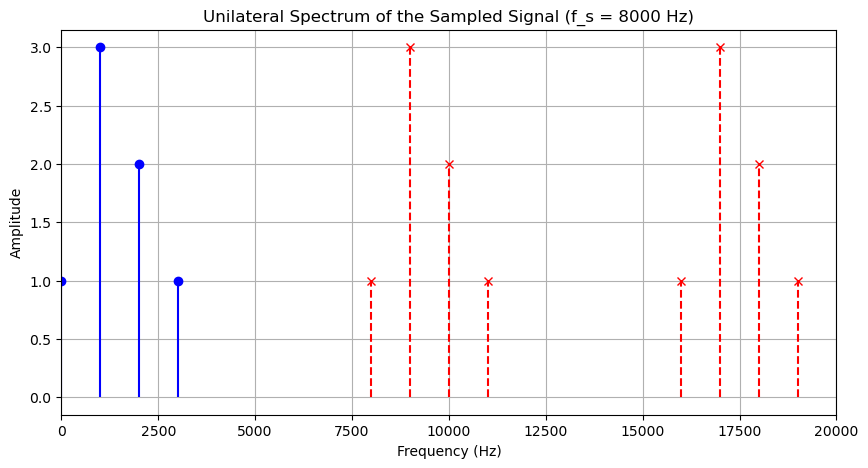

In [35]:
import matplotlib.pyplot as plt
import re

def extract_frequencies_and_amplitudes(expression):
    """
    Extracts amplitudes and frequencies from a mathematical expression of the type x(t).
    Example: x(t) = 2*cos(2*pi*2000*t) + cos(2*pi*4000*t) + 0.5*cos(pi*12000*t)
    Returns:
    - A list of tuples (amplitude, frequency)
    """
    matches = re.findall(r'([0-9]*\.?[0-9]+)?\s*\*\s*cos\((?:2\*pi|pi)\s*\*\s*(\d+)', expression)
    result = []
    for amp, freq in matches:
        amplitude = float(amp) if amp else 1.0  # Default amplitude = 1.0
        frequency = int(freq)
        result.append((amplitude, frequency))
    return result

def plot_signal_spectrum(frequencies_and_amplitudes, sampling_rate, frequency_limit):
    """
    Plots the bilateral and unilateral spectrum of a signal (original and sampled).
    """
    def plot_bilateral_spectrum(frequencies_and_amplitudes, title, sampling_freq=None, limit=20000):
        plt.figure(figsize=(10, 5))
        # Bilateral spectrum: divide amplitudes by 2
        for amp, f in frequencies_and_amplitudes:
            plt.stem([f, -f], [amp / 2, amp / 2], linefmt='b-', markerfmt='bo', basefmt=" ")

        # Aliases
        if sampling_freq:
            for amp, f in frequencies_and_amplitudes:
                for k in range(-3, 4):  # Copies around multiples of f_s
                    alias = f + k * sampling_freq
                    if abs(alias) <= limit:
                        plt.stem([alias], [amp / 2], linefmt='r--', markerfmt='rx', basefmt=" ")

        plt.title(title)
        plt.xlabel("Frequency (Hz)")
        plt.ylabel("Amplitude")
        plt.xlim(-limit, limit)
        plt.grid()
        plt.show()

    def plot_unilateral_spectrum(frequencies_and_amplitudes, title, sampling_freq=None, limit=20000):
        plt.figure(figsize=(10, 5))
        # Unilateral spectrum: original amplitudes
        for amp, f in frequencies_and_amplitudes:
            plt.stem([f], [amp], linefmt='b-', markerfmt='bo', basefmt=" ")

        # Aliases
        if sampling_freq:
            for amp, f in frequencies_and_amplitudes:
                for k in range(1, 4):  # Only positive aliases
                    alias = f + k * sampling_freq
                    if alias <= limit:
                        plt.stem([alias], [amp], linefmt='r--', markerfmt='rx', basefmt=" ")

        plt.title(title)
        plt.xlabel("Frequency (Hz)")
        plt.ylabel("Amplitude")
        plt.xlim(0, limit)
        plt.grid()
        plt.show()

    # Plot the bilateral spectrum
    plot_bilateral_spectrum(frequencies_and_amplitudes, "Bilateral Spectrum of the Original Signal")
    plot_bilateral_spectrum(frequencies_and_amplitudes, 
                            f"Bilateral Spectrum of the Sampled Signal (f_s = {sampling_rate} Hz)", 
                            sampling_rate, frequency_limit)

    # Plot the unilateral spectrum
    plot_unilateral_spectrum(frequencies_and_amplitudes, "Unilateral Spectrum of the Original Signal")
    plot_unilateral_spectrum(frequencies_and_amplitudes, 
                             f"Unilateral Spectrum of the Sampled Signal (f_s = {sampling_rate} Hz)", 
                             sampling_rate, frequency_limit)

# User input
print("=== Resolution of Bilateral and Unilateral Spectra ===")
x_t = input("Enter the full expression of x(t) (e.g., x(t) = 2*cos(2*pi*2000*t)) : ")

# Extract frequencies and amplitudes
frequencies_and_amplitudes = extract_frequencies_and_amplitudes(x_t)
print(f"Extracted Amplitudes and Frequencies: {frequencies_and_amplitudes}")
\
# Input the sampling frequency and frequency limit
sampling_rate = int(input("Enter the sampling frequency (in Hz): "))
frequency_limit = int(input("Enter the frequency limit for display (in Hz): "))

# Plot the spectra
plot_signal_spectrum(frequencies_and_amplitudes, sampling_rate, frequency_limit)


=== Low-Pass Filtering of Bilateral and Unilateral Spectra ===


Enter the full expression of x(t) (e.g., x(t) = 2*cos(2*pi*2000*t) + cos(2*pi*4000*t) + 4*cos(2*pi*6000*t)):  x(t) = 3*cos(2*pi*2000*t) + cos(2*pi*4000*t) + 1*cos(2*pi*0*t) + 0.5*cos(2*pi*12000*t)


Extracted Amplitudes and Frequencies: [(3.0, 2000), (1.0, 0), (0.5, 12000)]


Enter the cutoff frequency for the low-pass filter (in Hz):  1000


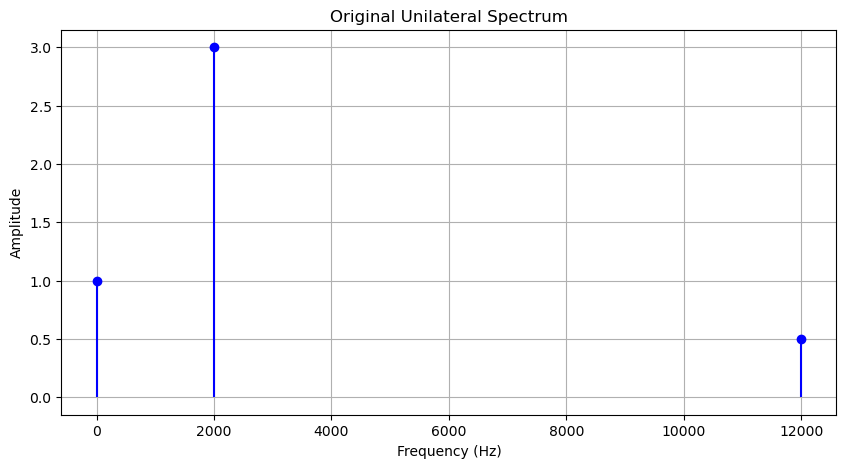

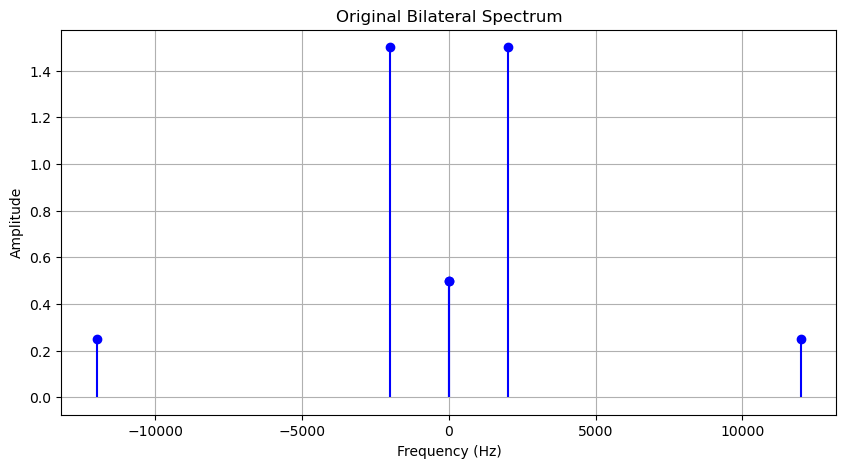

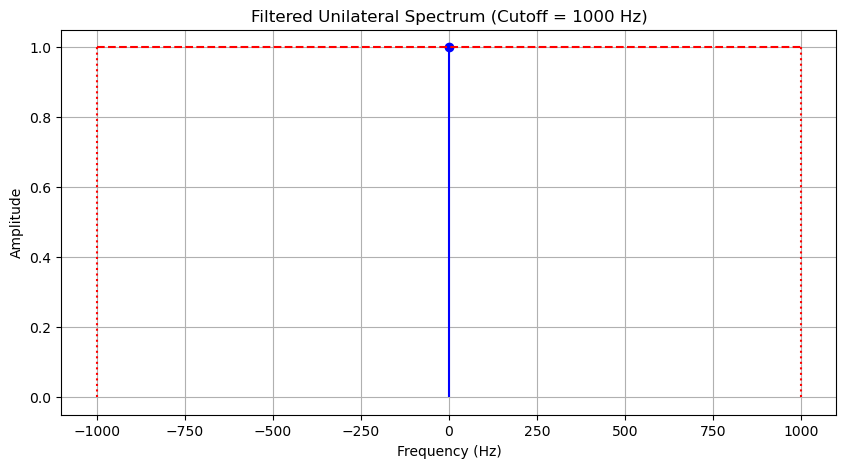

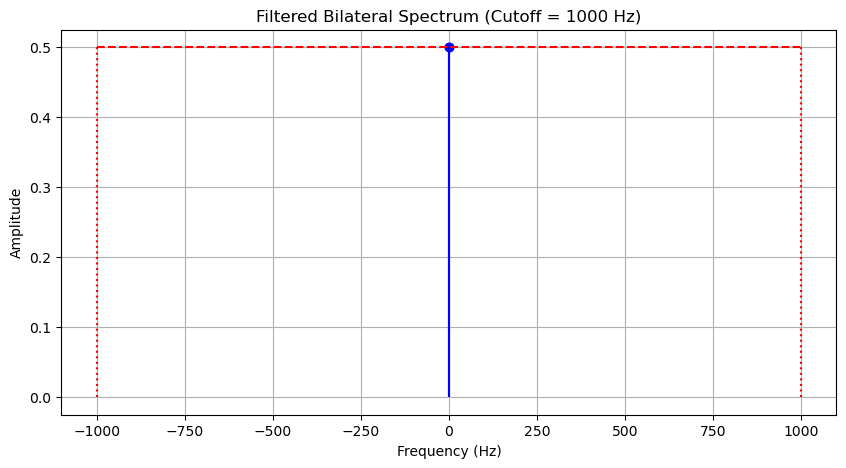

In [36]:
import matplotlib.pyplot as plt
import re

def extract_frequencies_and_amplitudes(expression):
    """
    Extracts amplitudes and frequencies from a mathematical expression of the form x(t).
    Example: x(t) = 2*cos(2*pi*2000*t) + cos(2*pi*4000*t) + 0.5*cos(2*pi*6000*t)
    Returns:
    - A list of tuples (amplitude, frequency)
    """
    matches = re.findall(r'([0-9]*\.?[0-9]+)?\s*\*\s*cos\((?:2\*pi)\s*\*\s*(\d+)', expression)
    result = []
    for amp, freq in matches:
        amplitude = float(amp) if amp else 1.0  # Default amplitude = 1.0 if not specified
        frequency = int(freq)
        result.append((amplitude, frequency))
    return result

def apply_lowpass_filter(frequencies_and_amplitudes, cutoff_frequency):
    """
    Applies an ideal low-pass filter by keeping frequencies <= cutoff_frequency.
    """
    return [(amp, freq) for amp, freq in frequencies_and_amplitudes if abs(freq) <= cutoff_frequency]

def plot_spectrum(frequencies_and_amplitudes, title, cutoff_frequency=None, bilateral=False):
    """
    Plots the bilateral or unilateral spectrum with a horizontal line for the low-pass filter.
    """
    plt.figure(figsize=(10, 5))
    
    # Plot the original frequencies
    for amp, freq in frequencies_and_amplitudes:
        if bilateral:
            plt.stem([freq, -freq], [amp / 2, amp / 2], linefmt='b-', markerfmt='bo', basefmt=" ")
        else:
            plt.stem([freq], [amp], linefmt='b-', markerfmt='bo', basefmt=" ")

    # Add the horizontal line for the filtered spectrum
    if cutoff_frequency and frequencies_and_amplitudes:
        max_amplitude = max(amp / 2 if bilateral else amp for amp, _ in frequencies_and_amplitudes)
        plt.hlines(max_amplitude, -cutoff_frequency, cutoff_frequency, colors='r', linestyles='dashed')
        plt.vlines([-cutoff_frequency, cutoff_frequency], 0, max_amplitude, colors='r', linestyles='dotted')

    plt.title(title)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.grid()
    plt.show()

# User input
print("=== Low-Pass Filtering of Bilateral and Unilateral Spectra ===")
x_t = input("Enter the full expression of x(t) (e.g., x(t) = 2*cos(2*pi*2000*t) + cos(2*pi*4000*t) + 4*cos(2*pi*6000*t)): ")

# Extract frequencies and amplitudes
frequencies_and_amplitudes = extract_frequencies_and_amplitudes(x_t)
print(f"Extracted Amplitudes and Frequencies: {frequencies_and_amplitudes}")

# Input the cutoff frequency
cutoff_frequency = int(input("Enter the cutoff frequency for the low-pass filter (in Hz): "))

# Original spectrum
plot_spectrum(frequencies_and_amplitudes, "Original Unilateral Spectrum", bilateral=False)
plot_spectrum(frequencies_and_amplitudes, "Original Bilateral Spectrum", bilateral=True)

# Low-pass filtering
filtered_frequencies = apply_lowpass_filter(frequencies_and_amplitudes, cutoff_frequency)

# Spectrum after filtering with a horizontal line
plot_spectrum(filtered_frequencies, f"Filtered Unilateral Spectrum (Cutoff = {cutoff_frequency} Hz)", 
              cutoff_frequency=cutoff_frequency, bilateral=False)
plot_spectrum(filtered_frequencies, f"Filtered Bilateral Spectrum (Cutoff = {cutoff_frequency} Hz)", 
              cutoff_frequency=cutoff_frequency, bilateral=True)
